

## Universidade Federal do Rio Grande do Sul (UFRGS)
## Programa de Pós-Graduação em Engenharia Civil (PPGEC)
## PEC00025: Introdução a teoria de vibração


### TRABALHO 01 -  RESPOSTA DE UM SISTEMA DE VIBRAÇÃO COM 1 GDL A UMA EXCITAÇÃO NA BASE: ESPECTRO DE PESCEUDO ACELERAÇÃO E PERIODOGRAMA


## Aluna: Gabriela Grützmacher Machado


[1.   Intodução](#section_1)  
[2.   Apresentação do sistema SDOF e dos dados de coleta do sistema de vibração sob excitação transiente](#section_2)    
[3.   Espectro de pseudo aceleração](#section_3)   
[4.   Periodograma de sinal](#section_4)  
[5.   Periodograma de saída](#section_5)  
[6.   Consideraçõs finais](#section_6)  

---
  
_Porto Alegre, RS, Brasil_ 


In [87]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from MRPy import MRPy


## 1. Introdução <a name="section_1"></a> 

O sistema de vibração forçada é decorrente de uma exitação dinâmica externa, causada por uma força ou deslocamento imposto. Nos casos de Engenharia Civil, as excitações transientes, como a ação do vento e de sismos são as mais comuns atuantes nas estruturas.
Neste contexto, o presente trabalho tem por finalidade descrever o espectro de pseudo aceleração, periodograma do sinal de entrada, pela aceleração e de saída, através da resposta de uma frequência determinada de um sistema com 1 GDL (SDOF) exposto a uma exitação dinâmica em sua base, situação de análise sísmica.
Para a obtenção dos resultados, utilizou-se a técnica do domínio do tempo, utilizada para as cargas transitórias, aplicando o método de integração numérica de Duhamel. A solução numérica pela técnica integral de Duhamel é restrita a sistemas lineares. Depende da superposição das respostas do sistema a uma sequência nos impulsos 𝐹 (𝜏) 𝑑𝜏. A solução geral da equação de equilíbrio de um sistema sdof submetido a uma carga geral 𝐹 (𝑡) é dada pela convolução dessa carga com a resposta impulsiva.
  



## 2. Apresentação do sistema SDOF e dos dados de coleta do sistema de vibração sob excitação transiente

O sistema proposto para a resolução deste trabalho é de um sistema de um Grau de Liberdade (SDOF - Single Degree of Freedom). A representação equivalnte do sistema para a realização da aquisição dos dados encontra-se na figura abaixo que consiste em um elemento com 1 GDL de massa _m_ fixado a uma superfície plana por uma mola com rigidez _k_ e um amortecedor com coeficiente de amortecimento _c_. A aceleração na base, representa a exitação dinâmica. 
Levando em conta o sistema proposto, a medição da vibração foi realizada na carroçaria de um automóvel sob exitação decorrente do acionamento do seu motor. Para tanto utilizou-se um aplicativo de celular, o INVH, disponível gratuitamente para download, versão 2.1.1, oferecido por Robert Bosch Engineering&Business Solutions(P) Ltd - BOSCH. Com o auxílio desse aplicativo foi possível realizar a leitura de vibração do referido sistema, sendo que a leitura de frequência realizada pelo app foi de 100 Hz (100 leituras no intervalo de 1 segundo). 
A medição foi relizada posicionando o aparelho celular sobre a parte superior da frente da carroçaria do veículo, correspondente à cobertura do motor (capô), em seguida o veículo foi ligado, sendo imposto acelerações em um pequeno período de tempo, a fim de causar uma excitação na base onde encontrava-se o aparelho celular. 


<img src ="data/sistema.png" alt="Heaviside" widh="1px" />





A seguir a definição das propriedades mecânicas do sistema SDOF:

In [60]:
m  = 5.0       # Massa atribuída ao sistema em Kg
Tn = np.linspace(0.2,12,1000)    # Período de 12 segundos
fn = 1.0/Tn       # Frequência natural em Hz
zt = 0.01      # Amortecimento
u0 = 0.        # deslocamento inicial
v0 = 0.        # velocidade inicial



O período de medição foi de 12 segundos, no intervalo de 0 a 12 segundos onde foi medido 1000 pontos.
Uma vez que as propriedades do sistema são especificadas, a implementação dos cálculos podem ser realizados através de rotinas computacionais em Python, utilizando o módulo MRPy (Multivariantt Random Processes With Python). 


O arquivo originado pelo aplicativo possui um formato .csv com quatro colunas, sendo a primeira o tempo de amostragem e as próximas três as acelerações ao longo dos três eixos de medição (𝑥, 𝑦 e 𝑧). O sinal  foi coletado nos trêis eixos (𝑥, 𝑦 e 𝑧), o período de exitação foi de 12 segundos. A baixo encontra-se a representação dos graficos de aceleração correspondentes a cada eixo.


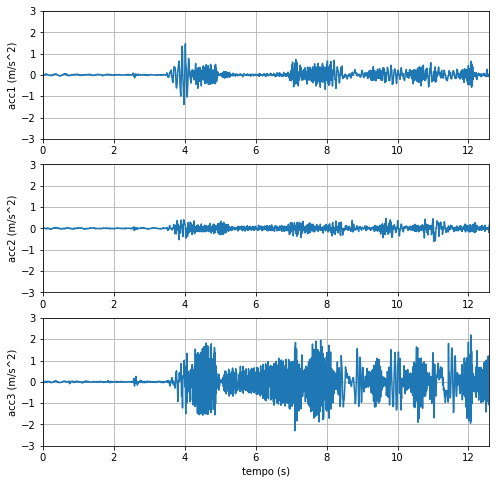

In [55]:
data = MRPy.from_file('data/iNVH001', form='invh').zero_mean()
t    = data.t_axis()

plt.figure(6, figsize=(8, 8), clear=True)

for kX, acc in enumerate(data):
    
    plt.subplot(3, 1 ,kX+1)
    plt.plot(t, acc)

    plt.xlim(0, data.Td);   
    plt.ylim(-3, 3);
    plt.ylabel('acc{0} (m/s^2)'.format(kX+1)) 

    plt.grid(True) 

plt.xlabel('tempo (s)');


Analisando os gráficos de acelereção, pode-se notar que o da aceleração no eixo 𝑧 (vertical), é o que possui valores mais significativos, pelo pressuposto de possuir maior amplitude, esses valores serão utilizados para os cálculos na sequência. A seguir o gráfico com os valores de aceleração no eixo  𝑧. Foi plotado também os valores de pico das máximas acelerações. 


[-0.03357596  0.0306126   0.01240806 ... -1.07287087  0.93731987
 -0.43229944]


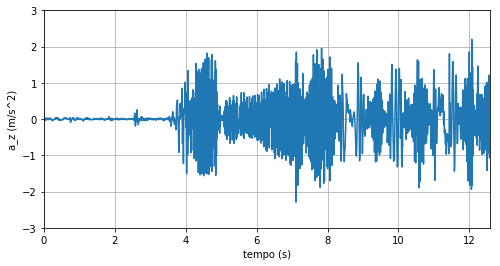

In [56]:
az = MRPy(data[2], data.fs)  
t  = az.t_axis()

plt.figure(7, figsize=(8, 4), clear=True)
plt.plot(t, az[0])

plt.xlim(0, az.Td);  plt.xlabel('tempo (s)') 
plt.ylim(-3, 3);   plt.ylabel('a_z (m/s^2)') 

plt.grid(True)

print(max(az))


## 3. Espectro de pseudo aceleração

Pela integral de Duhamel, calculou-se os deslocamentos máximos nos 1000 pontos do intervalo de 0 a 12s. A baixo encontra-se o gráfico que representa os máximos deslocamentos. 


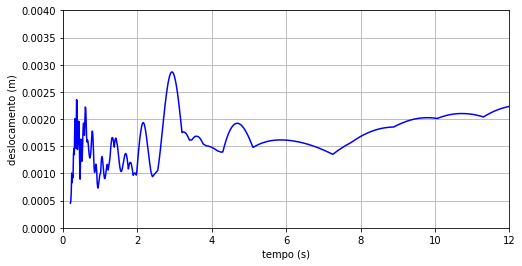

In [77]:
umax = np.zeros(fn.shape)

for k, f in enumerate(fn):
    u = az.sdof_Duhamel(f, zt, u0,v0)/m
    umax[k] = u.max()


plt.figure(8, figsize=(8, 4), clear=True)
plt.plot(Tn, umax, 'b')

plt.xlim(0, Tn[-1]);        plt.xlabel('tempo (s)') 
plt.ylim(0.000, 0.004);   plt.ylabel('deslocamento (m)') 

plt.grid(True)




A partir dos resultados dos deslocamentos máximos, calcula-se o espectro de pseudo aceleração no intervalo de tempo de 0 a 12s  pela seguinte expressão $a_p = \omega^{2}u_P$, abaixo encontra-se o gráfico de pseudo aceleração.

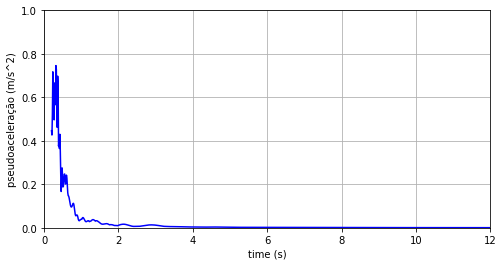

In [78]:
spam = (umax*(2*np.pi*fn)**2)

plt.figure(8, figsize=(8, 4), clear=True)
plt.plot(Tn, spam, 'b')

plt.xlim(0, Tn[-1]);        plt.xlabel('time (s)') 
plt.ylim(0.000, 1);   plt.ylabel('pseudoaceleração (m/s^2)') 

plt.grid(True)


## 4. Periodograma de sinal

O periodograma de sinal é calculado para determinar a excitação do sistema de 1GDL do presente trabalho.




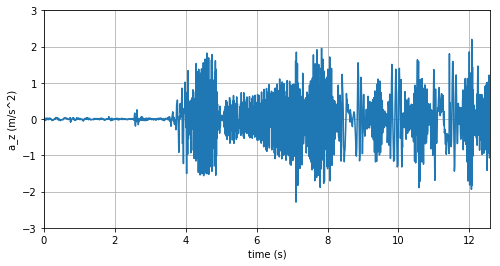

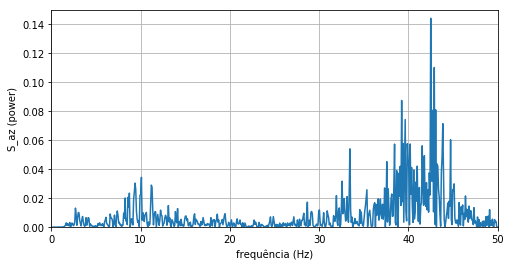

In [90]:
# Sinal da componente do acelerômetro em z- accz

data = MRPy.from_file('data/iNVH001', form='invh').zero_mean()
az   = MRPy(data[2], data.fs)
t    = az.t_axis()

plt.figure(4, figsize=(8, 4), clear=True)
plt.plot(t, az[0])

plt.xlim(0, az.Td); plt.xlabel('time (s)') 
plt.ylim(-3, 3);   plt.ylabel('a_z (m/s^2)') 

plt.grid(True) 

# Cálculo do periodograma de accz

Saz, fs = az.periodogram()
f       = az.f_axis()

plt.figure(5, figsize=(8, 4), clear=True)
plt.plot(f, Saz[0])

plt.xlim(0, 50);    plt.xlabel('frequência (Hz)')
plt.ylim(-0.0,0.15);  plt.ylabel('S_az (power)')

plt.grid(True)




In [91]:
fpico = f[np.argmax(Saz[0])]
print("Valor de pico:", fpico, "Hz")

Valor de pico: 42.49287038927206 Hz


o gráfico acima representa a frequência do sistema, o valor de frequância dominante, ou seja, maior frequência esta compreendido no intervalo de 40 a 50 Hz igual a 42,49 Hz,


## 5. Periodograma de saída

O periodograma de saída representa a resposta da estrutura para a frequência máxima, plotada acima. 
Abaixo encontra-se a representação do periodograma de saída.

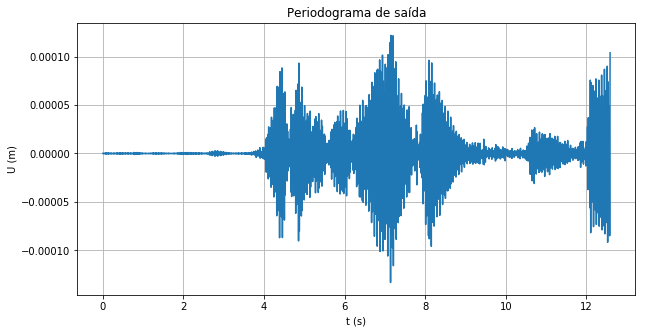

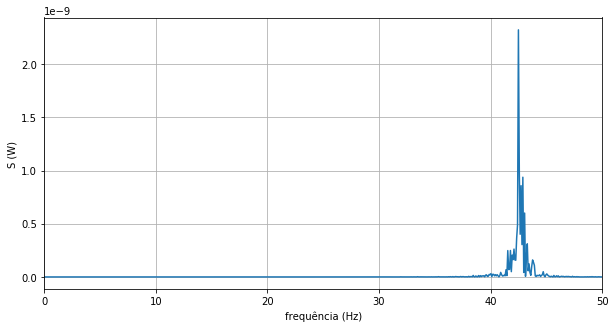

In [95]:
fnout = 42.49287038927206
uout = az.sdof_Duhamel(fnout, zt, u0, v0)/m

plt.figure(figsize=(10, 5))
plt.title("Periodograma de saída")
plt.plot(t, uout[0])
plt.xlabel('t (s)') 
plt.ylabel('U (m)')

plt.grid(True)

Sout, fsout = uout.periodogram()
fout = uout.f_axis()

plt.figure(figsize=(10, 5))
plt.plot(fout, Sout[0])
plt.xlim(0, 15); plt.xlabel('frequência (Hz)') 
plt.xlim(0, 50); plt.ylabel('S (W)') 

plt.grid(True)

## 6. Considerações finais

Conforme explicitado, após a coleta dos dados se pode realizar o gráfico espectro de pseudo aceleração, que é a resposta do sistema a excitação imposta, conforme os resultados, avaliou-se que na variação de tempo determinada, o valor máximo de pseudo aceleração gerado é próximo a _**0,8 m/s^2**_. Esse valor corresponde a vibração caracteristica relacionada a sismos. Ademais, calculou-se o periodograma de entrada do sistema, com esse gráfico, pode-se determinar a frequência que é de _**42,49Hz**_. Por fim foi determinado o periodograma de saída através de um gráfico, demostrando o deslocamento ocorrido no período de tempo pela frequência de pico.

